# Análise de dados COVID-19 em Portugal

Análise de dados com uso de série temporais.

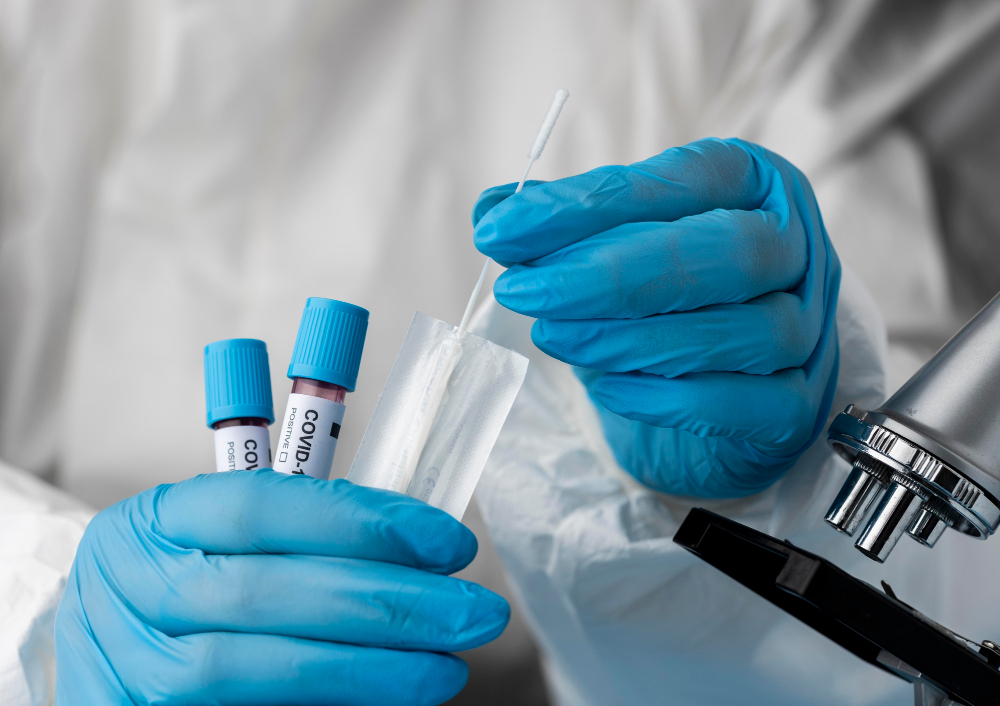

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import re
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#carregar dados
df = pd.read_csv('dados1/covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])

In [3]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [4]:
#Verificar tipo de dados
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [41]:
#Nomes de colunas
df.columns

Index(['sno', 'observationdate', 'provincestate', 'countryregion',
       'lastupdate', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [42]:
#Países
df['countryregion'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [43]:
#Excluir letras maiúsculas e caracteres
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [44]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [45]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


## Análise exploratória de dados

In [46]:
# Shape
df.shape

(26713, 8)

In [54]:
#Localizar dados do Canadá
df.loc[df.countryregion == 'Portugal']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
3035,3036,2020-03-02,NaN,Portugal,2020-03-02 22:43:02,2.0,0.0,0.0
3178,3179,2020-03-03,NaN,Portugal,2020-03-03 15:33:02,2.0,0.0,0.0
3321,3322,2020-03-04,NaN,Portugal,2020-03-04 12:43:03,5.0,0.0,0.0
3475,3476,2020-03-05,NaN,Portugal,2020-03-05 13:53:03,8.0,0.0,0.0
3649,3650,2020-03-06,NaN,Portugal,2020-03-06 20:33:03,13.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24959,24960,2020-05-15,NaN,Portugal,2020-05-16 02:32:19,28583.0,1190.0,3328.0
25336,25337,2020-05-16,NaN,Portugal,2020-05-17 02:32:32,28810.0,1203.0,3822.0
25713,25714,2020-05-17,NaN,Portugal,2020-05-18 02:32:21,29036.0,1218.0,4636.0
26090,26091,2020-05-18,NaN,Portugal,2020-05-19 02:32:18,29209.0,1231.0,6430.0


## Casos confirmados

In [51]:
portugal = df.loc[(df.countryregion == 'Portugal') & (df.confirmed > 0)]

In [53]:
px.line(portugal, 'observationdate', 'confirmed', 
        labels={'observationdate':'Data', 'confirmed':'Número de casos confirmados'},
       title='Casos confirmados em Portugal')

## Número de novos casos por dia

In [55]:
# Contagem de novos casos
portugal['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else portugal['confirmed'].iloc[x] - portugal['confirmed'].iloc[x-1],
    np.arange(portugal.shape[0])
))

/tmp/ipykernel_47781/3635294687.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
portugal

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
3035,3036,2020-03-02,NaN,Portugal,2020-03-02 22:43:02,2.0,0.0,0.0,0.0
3178,3179,2020-03-03,NaN,Portugal,2020-03-03 15:33:02,2.0,0.0,0.0,0.0
3321,3322,2020-03-04,NaN,Portugal,2020-03-04 12:43:03,5.0,0.0,0.0,3.0
3475,3476,2020-03-05,NaN,Portugal,2020-03-05 13:53:03,8.0,0.0,0.0,3.0
3649,3650,2020-03-06,NaN,Portugal,2020-03-06 20:33:03,13.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
24959,24960,2020-05-15,NaN,Portugal,2020-05-16 02:32:19,28583.0,1190.0,3328.0,264.0
25336,25337,2020-05-16,NaN,Portugal,2020-05-17 02:32:32,28810.0,1203.0,3822.0,227.0
25713,25714,2020-05-17,NaN,Portugal,2020-05-18 02:32:21,29036.0,1218.0,4636.0,226.0
26090,26091,2020-05-18,NaN,Portugal,2020-05-19 02:32:18,29209.0,1231.0,6430.0,173.0


In [57]:
# Visualização através do gráfico
px.line(portugal, x='observationdate', y='novoscasos', title='Novos casos por dia',
       labels={'observationdate': 'Data', 'novoscasos': 'Novos casos'})

## Mortes

In [58]:
#Visualização do número de mortes através do gráfico
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=portugal.observationdate, y=portugal.deaths, name='Mortes', mode='lines+markers',
              line=dict(color='red'))
)
#Edita o layout
fig.update_layout(title='Mortes por COVID-19 em Portugal',
                   xaxis_title='Data',
                   yaxis_title='Número de mortes')
fig.show()

# Taxa de crescimento

Cálculo da taxa de crescimento do COVID desde o primeiro caso.

In [59]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [60]:
cresc_medio = taxa_crescimento(portugal, 'confirmed')
print(f"O crescimento médio do COVID em Portugal no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID em Portugal no período avaliado foi de 13.09%.


Calcular a taxa de crescimento diário.

In [61]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    n = (data_fim - data_inicio).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [62]:
tx_dia = taxa_crescimento_diaria(portugal, 'confirmed')

In [63]:
tx_dia

array([  0.        , 150.        ,  60.        ,  62.5       ,
        53.84615385,  50.        ,   0.        ,  36.66666667,
        43.90243902,   0.        ,  89.83050847,  50.89285714,
        44.9704142 ,  35.10204082,  35.34743202,   0.        ,
        75.22321429,  29.93630573,  25.49019608,  25.        ,
        28.75      ,  14.66019417,  26.79932261,  18.33055092,
        20.42889391,  21.13402062,  15.31914894,   7.48071117,
        16.15168539,  10.8558377 ,   9.48975882,   9.4310383 ,
         6.45357071,   7.16457621,   4.0078028 ,   6.06990622,
         5.61806783,   6.20196332,  10.86271138,   3.32859359,
         3.74053919,   2.10431112,   3.03531357,   3.68523613,
         4.14570781,   0.96067088,   3.48543791,   2.64668529,
         3.25150945,   2.47327805,   2.82052481,   1.68774452,
         1.98631056,   2.60999254,   2.01778386,   0.68303721,
         1.22778541,   0.75240523,   2.20363191,   1.22180076,
        -0.63508343,   0.3652243 ,   0.95720275,   0.69

In [65]:
primeiro_dia = portugal.observationdate.loc[portugal.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, portugal.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados em Portugal',
       labels={'y':'Taxa de crescimento', 'x':'Data'})

# Análise Preditiva

In [23]:
#Importar bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

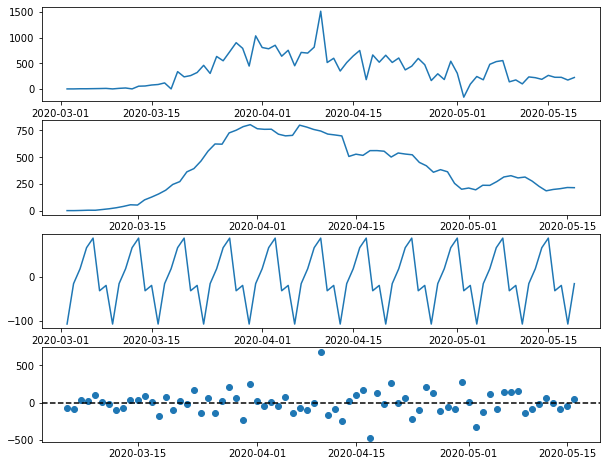

In [66]:
novoscasos = portugal.novoscasos
novoscasos.index = portugal.observationdate

res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

## Decompondo a série de confirmados



In [67]:
confirmados = portugal.confirmed
confirmados.index = portugal.observationdate

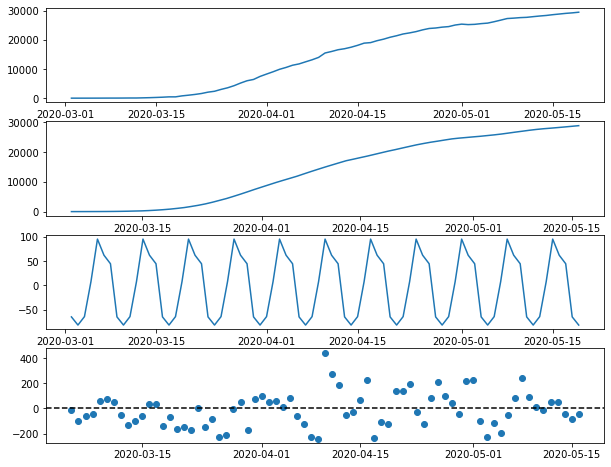

In [68]:
res2 = seasonal_decompose(confirmados)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed)
ax2.plot(res2.trend)
ax3.plot(res2.seasonal)
ax4.scatter(confirmados.index, res2.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Utilizar ARIMA para fazer análise preditiva

In [27]:
!pip install pmdarima

In [69]:
from pmdarima.arima import auto_arima

In [70]:
modelo = auto_arima(confirmados)

In [71]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

In [72]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-05-20', '2020-06-05'), y=modelo.predict(15), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 15 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()

# Forecasting com Facebook Prophet

In [33]:
from prophet import Prophet

In [73]:
# preparando os dados
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#pop = 1000000
pop = 10086410 #https://countrymeters.info/pt/Portugal
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [74]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados em Portugal')
fig.show()